In [4]:
"""
https://www.tensorflow.org/tutorials/quickstart/beginner
https://www.tensorflow.org/tutorials/keras/classification
"""

import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

In [5]:
"""Verify the installation"""

print(f"tf = {tf.__version__} | tfds = {tfds.__version__}")
print(tf.reduce_sum(tf.random.normal([1000, 1000])))
print(tf.config.list_physical_devices("GPU"))

tf = 2.15.0 | tfds = 4.9.4
tf.Tensor(1669.1572, shape=(), dtype=float32)
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
"""Load mnist data"""

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

print(f"{x_train.shape =} | {y_train.shape = }")
print(f"{x_test.shape =} | {y_test.shape = }")

x_train.shape =(60000, 28, 28) | y_train.shape = (60000,)
x_test.shape =(10000, 28, 28) | y_test.shape = (10000,)


In [7]:
print(f"{x_train[0].shape = }")
print(f"X[0] data =")
x_train[0]

x_train[0].shape = (28, 28)
X[0] data =


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
print(f"{y_train[0].shape = }")
print(f"Y[0] data (label) =")
y_train[0]

y_train[0].shape = ()
Y[0] data (label) =


5

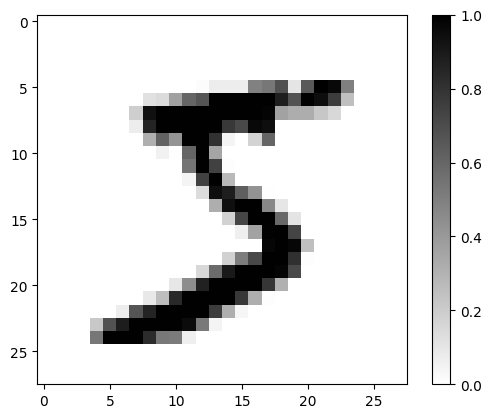

In [9]:
plt.figure()
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

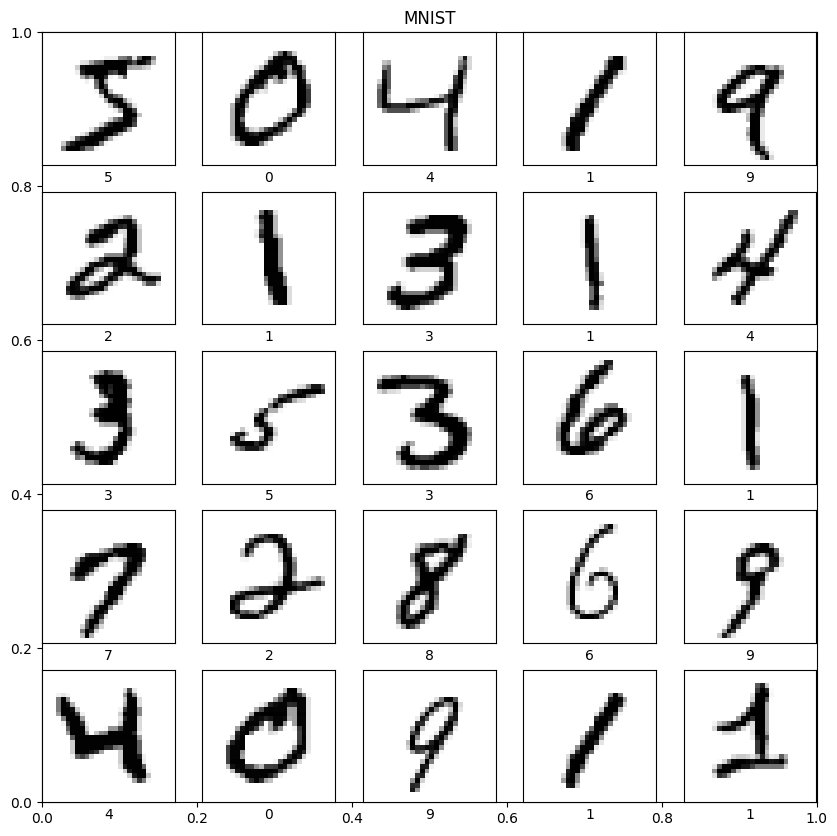

In [10]:
plt.figure(figsize=(10, 10))
plt.title("MNIST")
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [65]:
"""---------------mnist_corrupted----------------"""

'---------------mnist_corrupted----------------'

In [66]:
"""https://www.tensorflow.org/datasets/catalog/overview"""

tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bot_adversarial_dialogue',
 'bridge',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_b

In [103]:
(x_train_c, y_train_c), (x_test_c, y_test_c) = tfds.as_numpy(
    tfds.load(
        "mnist_corrupted",
        split=["train", "test"],
        batch_size=-1,
        shuffle_files=True,
        as_supervised=True,
    )
)

print(f"{x_train_c.shape =} | {y_train_c.shape = }")
print(f"{x_test_c.shape =} | {y_test_c.shape = }")

x_train_c.shape =(60000, 28, 28, 1) | y_train_c.shape = (60000,)
x_test_c.shape =(10000, 28, 28, 1) | y_test_c.shape = (10000,)


In [104]:
x_train_c[:, :, :, 0].shape

(60000, 28, 28)

In [105]:
x_train_c = x_train_c[:, :, :, 0]
x_test_c = x_test_c[:, :, :, 0]

In [106]:
x_train_c, x_test_c = x_train_c / 255.0, x_test_c / 255.0

print(f"{x_train_c.shape =} | {y_train_c.shape = }")
print(f"{x_test_c.shape =} | {y_test_c.shape = }")

x_train_c.shape =(60000, 28, 28) | y_train_c.shape = (60000,)
x_test_c.shape =(10000, 28, 28) | y_test_c.shape = (10000,)


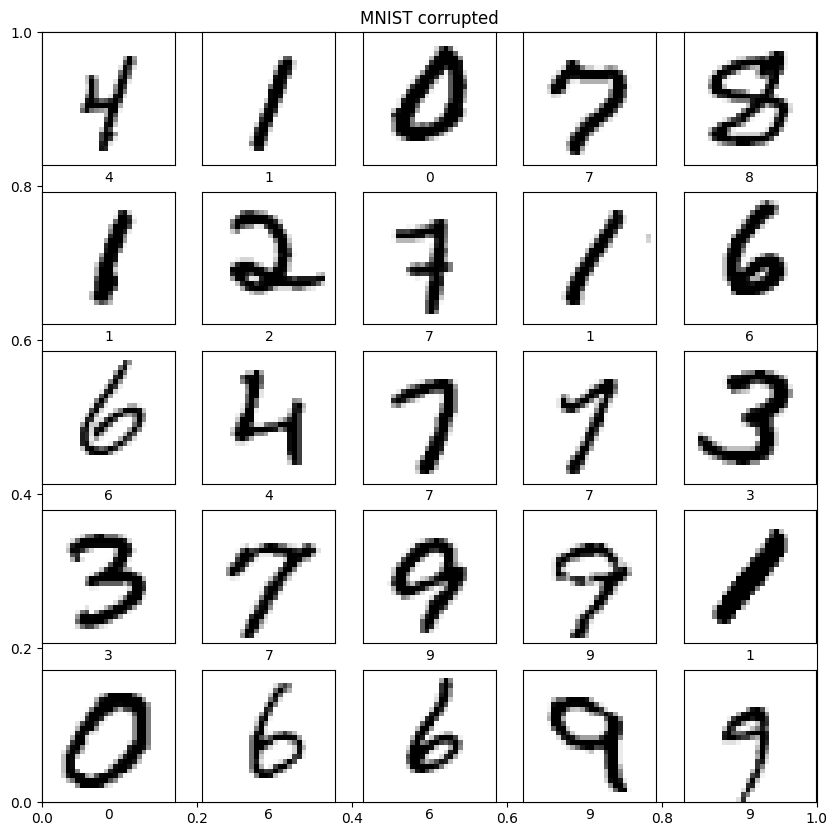

In [107]:
plt.figure(figsize=(10, 10))
plt.title("MNIST corrupted")
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_c[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_c[i])
plt.show()

In [108]:
"""Build a tf.keras.Sequential model:"""

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(10),
    ]
)

In [109]:
"""For each example, the model returns a vector of logits or log-odds scores, one for each class."""

predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.6218318 , -0.29247624,  0.04824749,  0.36252236,  0.47980148,
         0.668342  , -0.6879255 , -0.8872447 ,  0.8729228 , -0.5953026 ]],
      dtype=float32)

In [110]:
"""The tf.nn.softmax function converts these logits to probabilities for each class:"""

tf.nn.softmax(predictions).numpy()

array([[0.14873013, 0.05961011, 0.08380973, 0.11475782, 0.12903751,
        0.15581098, 0.04014011, 0.03288633, 0.19118172, 0.04403563]],
      dtype=float32)

In [111]:
"""Define a loss function for training"""

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [112]:
"""This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to -tf.math.log(1/10) ~= 2.3."""

loss_fn(y_train[:1], predictions).numpy()

1.8591118

In [113]:
"""configure and compile the model"""

model.compile(
    optimizer="adam",
    loss=loss_fn,
    metrics=["accuracy"],
)

In [114]:
"""combine 2 mnist datasets"""

x_train_combo = np.concatenate([x_train, x_train_c])
y_train_combo = np.concatenate([y_train, y_train_c])
print(f"{x_train_combo.shape = } | {y_train_combo.shape = }")

x_test_combo = np.concatenate([x_test, x_test_c])
y_test_combo = np.concatenate([y_test, y_test_c])
print(f"{x_test_combo.shape = } | {y_test_combo.shape = }")

x_train_combo.shape = (120000, 28, 28) | y_train_combo.shape = (120000,)
x_test_combo.shape = (20000, 28, 28) | y_test_combo.shape = (20000,)


In [115]:
"""Train and evaluate your model"""

history = model.fit(x_train_combo, y_train_combo, epochs=5)

Epoch 1/5
3750/3750 [==============================] - 5s 1ms/step - loss: 0.2426 - accuracy: 0.9285
Epoch 2/5
3750/3750 [==============================] - 5s 1ms/step - loss: 0.1177 - accuracy: 0.9641
Epoch 3/5
3750/3750 [==============================] - 5s 1ms/step - loss: 0.0903 - accuracy: 0.9721
Epoch 4/5
3750/3750 [==============================] - 5s 1ms/step - loss: 0.0744 - accuracy: 0.9764
Epoch 5/5
3750/3750 [==============================] - 5s 1ms/step - loss: 0.0641 - accuracy: 0.9795


In [116]:
"""compare how the model performs on the test dataset"""

test_loss, test_acc = model.evaluate(x_test_combo, y_test_combo, verbose=2)
print(f"Test accuracy: {test_acc}")

625/625 - 1s - loss: 0.0744 - accuracy: 0.9783 - 668ms/epoch - 1ms/step
Test accuracy: 0.9782999753952026


In [117]:
"""model.fit() returns a History object that contains a dictionary with everything that happened during training:"""

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

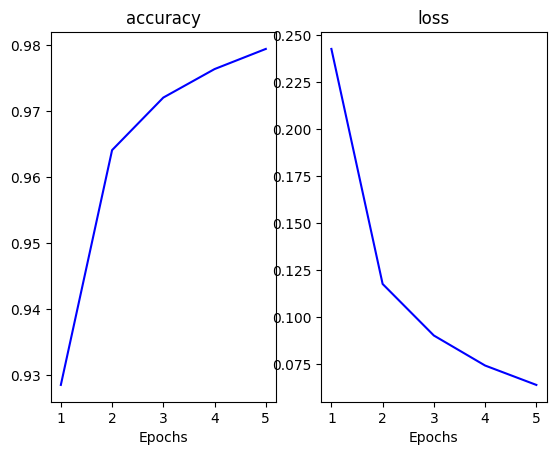

In [118]:
acc = history_dict["accuracy"]
loss = history_dict["loss"]

epochs = range(1, len(acc) + 1)

plt.subplot(121)
plt.plot(epochs, acc, "b", label="accuracy")
plt.title("accuracy")
plt.xlabel("Epochs")

plt.subplot(122)
plt.plot(epochs, loss, "b", label="loss")
plt.title("loss")
plt.xlabel("Epochs")

plt.show()

In [119]:
"""
Make predictions.
With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.
"""

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [120]:
predictions = probability_model.predict(x_test_combo)

625/625 [==============================] - 0s 677us/step


In [121]:
"""Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:"""

predictions[0]

array([2.3897617e-10, 7.7334267e-10, 5.7105110e-10, 1.7920953e-06,
       5.9691699e-15, 5.3882265e-10, 1.0256927e-18, 9.9999821e-01,
       2.2949087e-10, 2.3560283e-08], dtype=float32)

In [122]:
y_test_combo[110]

8

In [123]:
"""Define functions to graph the full set of 10 class predictions."""


def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            predicted_label, 100 * np.max(predictions_array), true_label
        ),
        color=color,
    )


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

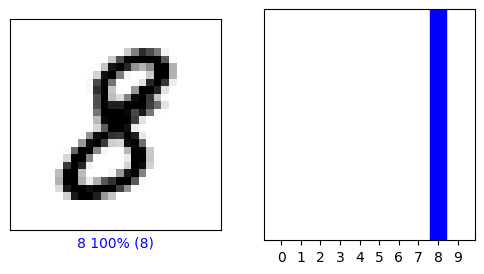

In [124]:
"""Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label."""

i = 110
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], y_test_combo, x_test_combo)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], y_test_combo)
plt.show()

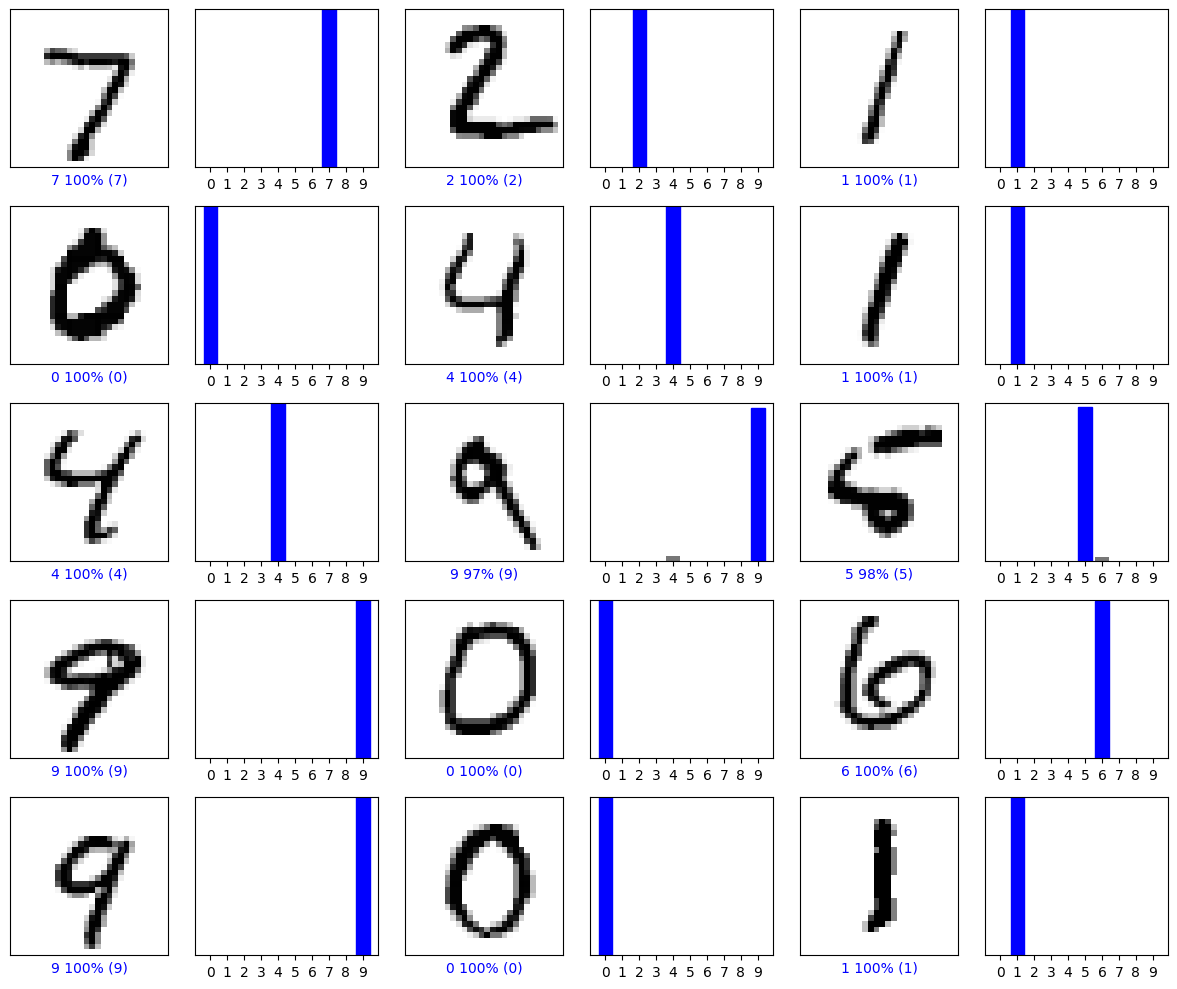

In [125]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test_combo, x_test_combo)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], y_test_combo)
plt.tight_layout()
plt.show()

In [126]:
"""-----------------------------"""

'-----------------------------'

In [127]:
"""Myne"""

'Myne'

In [128]:
target_for_tf = [
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.16470588235294115,
        0.3764705882352941,
        0.41960784313725497,
        0.3019607843137254,
        0.08627450980392148,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.08627450980392148,
        0.7333333333333334,
        1.0,
        1.0,
        1.0,
        1.0,
        0.9686274509803922,
        0.5450980392156863,
        0.0117647058823529,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.7647058823529411,
        1.0,
        0.615686274509804,
        0.180392156862745,
        0.0980392156862745,
        0.2705882352941176,
        0.8117647058823529,
        1.0,
        0.4784313725490196,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.1215686274509804,
        1.0,
        0.803921568627451,
        0.0,
        0.0,
        0.0,
        0.0,
        0.1333333333333332,
        1.0,
        0.8235294117647058,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.16470588235294115,
        1.0,
        0.6666666666666667,
        0.0,
        0.0,
        0.0,
        0.0,
        0.019607843137254832,
        0.9921568627450981,
        0.8666666666666667,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0235294117647058,
        0.9333333333333333,
        0.9176470588235294,
        0.07058823529411751,
        0.0,
        0.0,
        0.0,
        0.32156862745098036,
        1.0,
        0.6274509803921569,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.38039215686274497,
        1.0,
        0.8352941176470589,
        0.2549019607843136,
        0.0039215686274509665,
        0.37254901960784315,
        0.9490196078431372,
        0.8705882352941177,
        0.09411764705882342,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.3647058823529412,
        0.9450980392156862,
        1.0,
        0.9176470588235294,
        1.0,
        0.6235294117647059,
        0.07058823529411751,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0039215686274509665,
        0.3882352941176469,
        0.9254901960784314,
        0.9725490196078431,
        0.9529411764705882,
        1.0,
        0.7607843137254902,
        0.180392156862745,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.6313725490196078,
        1.0,
        0.6823529411764706,
        0.1098039215686274,
        0.05490196078431364,
        0.47058823529411764,
        0.9607843137254902,
        0.9764705882352941,
        0.3176470588235294,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.3294117647058824,
        1.0,
        0.6862745098039216,
        0.0039215686274509665,
        0.0,
        0.0,
        0.0,
        0.1725490196078432,
        0.9490196078431372,
        0.9529411764705882,
        0.07450980392156858,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.6313725490196078,
        1.0,
        0.25098039215686274,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.5647058823529412,
        1.0,
        0.33725490196078434,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.6666666666666667,
        1.0,
        0.21176470588235297,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.5215686274509803,
        1.0,
        0.36078431372549025,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.4745098039215686,
        1.0,
        0.5843137254901961,
        0.0,
        0.0,
        0.0,
        0.0,
        0.050980392156862786,
        0.8627450980392157,
        0.996078431372549,
        0.14509803921568631,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.06666666666666665,
        0.8862745098039215,
        1.0,
        0.7019607843137254,
        0.3882352941176469,
        0.3137254901960784,
        0.44705882352941173,
        0.8627450980392157,
        1.0,
        0.580392156862745,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.11372549019607847,
        0.6588235294117647,
        0.9764705882352941,
        1.0,
        1.0,
        1.0,
        0.8980392156862745,
        0.44705882352941173,
        0.007843137254901822,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.027450980392156876,
        0.16470588235294115,
        0.20392156862745092,
        0.12941176470588234,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
]

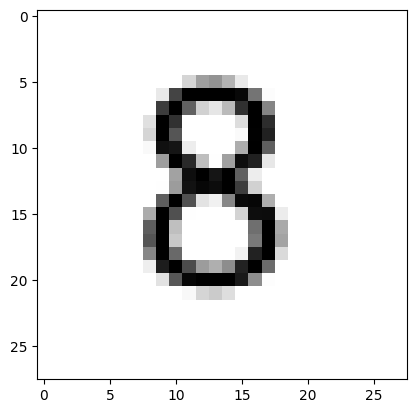

In [129]:
plt.imshow(target_for_tf, cmap=plt.cm.binary)
plt.show()

In [130]:
my_img = np.array(target_for_tf)

In [131]:
print(f"{my_img.shape = }")
my_img

my_img.shape = (28, 28)


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [132]:
# Add the image to a batch where it's the only member.
img_to_predict = np.expand_dims(my_img, 0)

print(f"{img_to_predict.shape = }")

img_to_predict.shape = (1, 28, 28)


In [133]:
predictions_single = probability_model.predict(img_to_predict)

predictions_single

1/1 [==============================] - 0s 40ms/step


array([[0.03747087, 0.00147924, 0.02197985, 0.01477193, 0.09244139,
        0.01374155, 0.00862314, 0.03393101, 0.70428413, 0.07127692]],
      dtype=float32)

In [134]:
np.argmax(predictions_single[0])

8

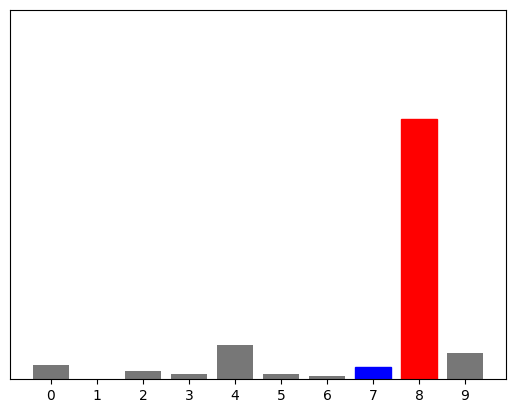

In [135]:
plot_value_array(0, predictions_single[0], y_test)

In [102]:
"""-------save model------"""

'-------------'

In [175]:
from dj_config.settings import BASE_DIR
import keras
from datetime import datetime

model_version = datetime.now().strftime("%Y_%m_%d_%H_%M")

"""# The file needs to end with the .keras extension"""
model_save_path = f"{BASE_DIR}/ml_data/trained_mnist_{model_version}.keras"

model.save(model_save_path)

In [176]:
"""Loading the model back:"""

reconstructed_model = keras.models.load_model(model_save_path)

In [177]:
"""Let's check:"""

np.testing.assert_allclose(
    model.predict(x_test_combo),
    reconstructed_model.predict(x_test_combo),
)

625/625 [==============================] - 0s 679us/step


In [178]:
reconstructed_probability_model = tf.keras.Sequential(
    [reconstructed_model, tf.keras.layers.Softmax()]
)
reconstructed_predictions = reconstructed_probability_model.predict(x_test_combo)

625/625 [==============================] - 0s 665us/step


1/1 [==============================] - 0s 43ms/step
reconstructed_predictions_single = array([[0.03747087, 0.00147924, 0.02197985, 0.01477193, 0.09244139,
        0.01374155, 0.00862314, 0.03393101, 0.70428413, 0.07127692]],
      dtype=float32)
predictions number = 8


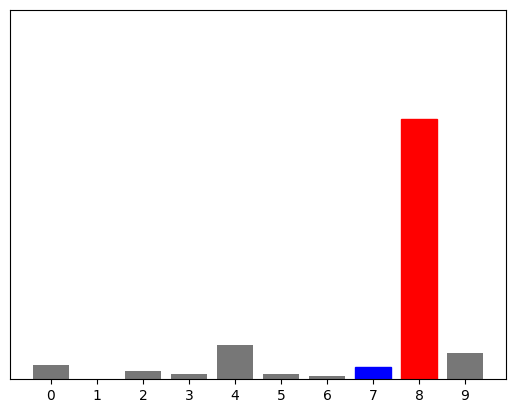

In [179]:
reconstructed_predictions_single = reconstructed_probability_model.predict(
    img_to_predict
)

print(f"{reconstructed_predictions_single = }")
print(f"predictions number = {np.argmax(reconstructed_predictions_single[0])}")
plot_value_array(0, reconstructed_predictions_single[0], y_test)

In [180]:
"""----------------DONE-------------------"""

'----------------DONE-------------------'